# Einsendeaufgabe 2

## Aufgabe 1.1

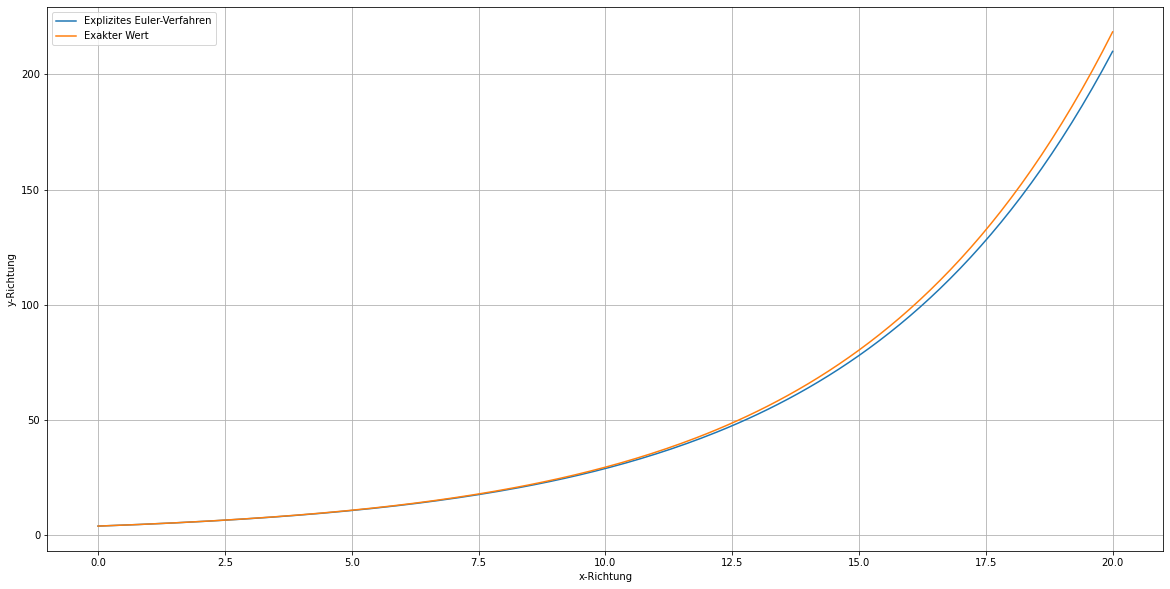

In [185]:
import numpy as np
import matplotlib.pyplot as plt


#Modellfunktion
def function(x, t):
    c = 0.2
    dxdt = c*x
    return dxdt


def explizitesEulerverfahren(t0, tN, n):
    h = (tN - t0) / n          #Zeitschritte
    x = 4                      #Anfangswert
    
    result = np.empty(n + 1)
    result.put(0, x)
    timesteps = np.linspace(t0, tN, n+1)
    
    for i in range(1, n + 1):
        x = x + h * function(x, timesteps[i])
        result.put(i, x)
    
    return [timesteps, result]


result = explizitesEulerverfahren(0, 20, 200)

plt.figure(figsize=(20, 10))

plt.plot(result[0], result[1], label='Explizites Euler-Verfahren')
plt.plot(result[0], 4 * (np.exp(0.2 * result[0])), label='Exakter Wert')

plt.legend(loc='upper left')
plt.xlabel('x-Richtung')
plt.ylabel('y-Richtung')
plt.grid()
plt.show()

## Aufgabe 1.2

Je weniger Zeitschritte verwendet werden, desto größer wird der Fehler des Verfahrens. Das Verfahren ist in diesem Fall allerdings Stabiel.

## Aufgabe 1.3

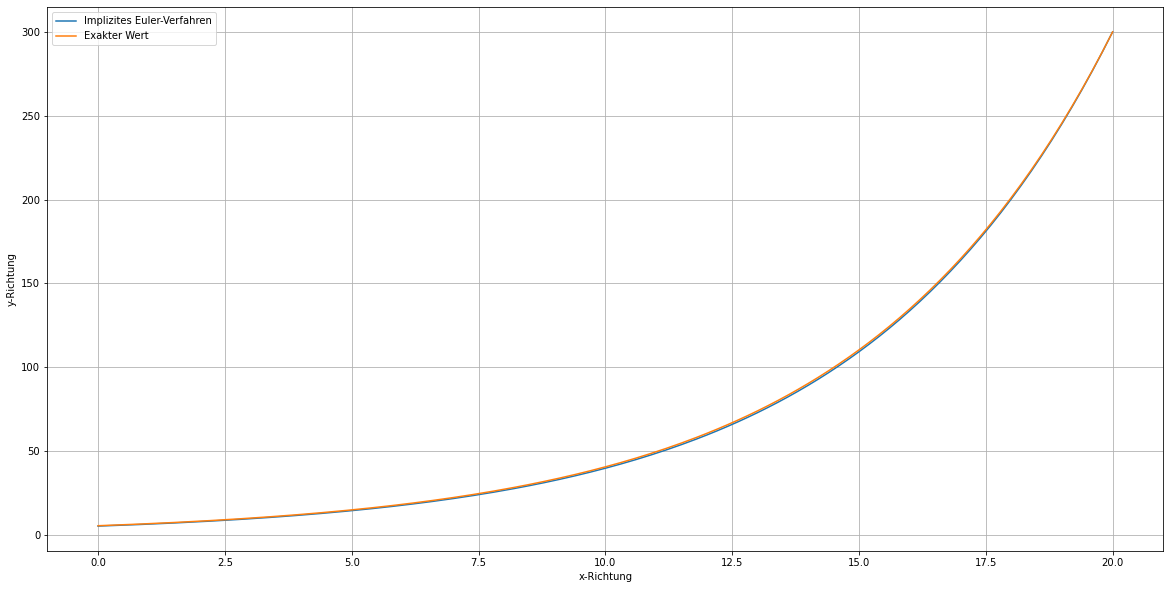

In [186]:
import numpy as np
import matplotlib.pyplot as plt


#Modellfunktion
def function(x,t):
    c = 0.2
    dxdt = c * x
    return dxdt



def implizitesEulerverfahren(t0, tN, n):
    h = (tN - t0) / n          #Zeitschritte
    x = 300                    #Endwert
    
    result = np.empty(n + 1)
    result.put(n, x)
    timesteps = np.linspace(t0, tN, n+1)
    
    for i in reversed(range(0, n)):
        x = x - h * function(x, timesteps[i])
        result.put(i, x)
    
    return [timesteps, result]



result = implizitesEulerverfahren(0, 20, 200)

plt.figure(figsize=(20, 10))

plt.plot(result[0], result[1], label='Implizites Euler-Verfahren')
a = 300 / np.exp(0.2 * 20) #Anfangswert
plt.plot(result[0], a * (np.exp(0.2 * result[0])), label='Exakter Wert')

plt.legend(loc='upper left')
plt.xlabel('x-Richtung')
plt.ylabel('y-Richtung')
plt.grid()
plt.show()

Im Wasserbecken sind zum Zeitpunkt $t_o$ 5 Wasserschnecken

## Aufgabe 1.4

Erst bei einem $x < 0$ sind die Wasserschnecken vom Aussterben betroht.

## Aufgabe 2.1

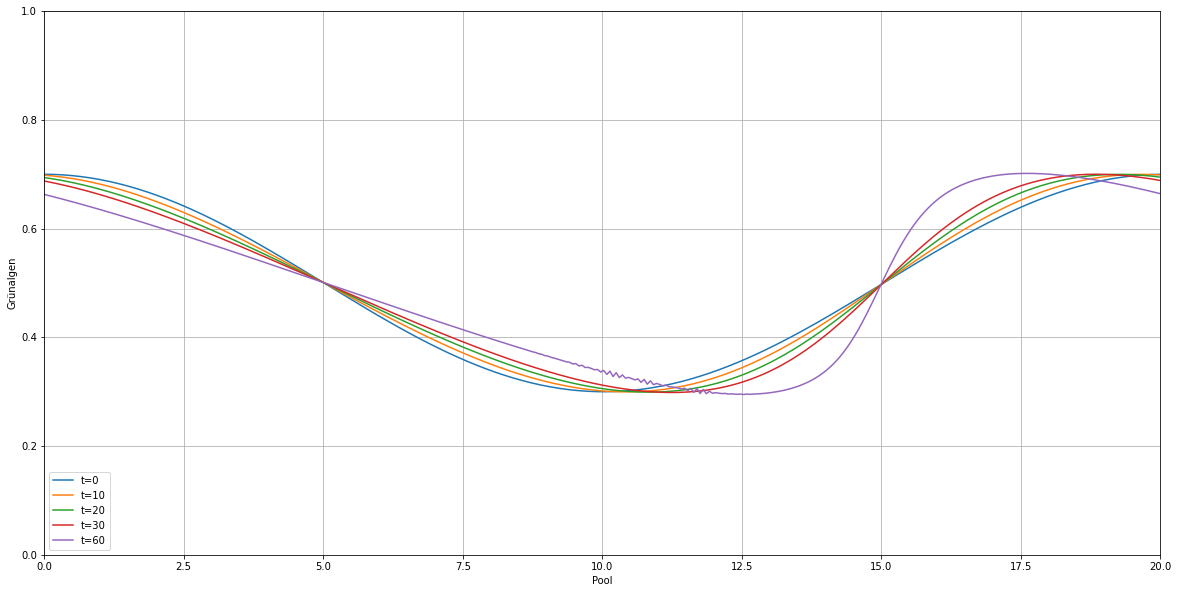

In [189]:
import numpy as np
import matplotlib.pyplot as plt



v_max = 0.1
roh_max = 1


#Modell des Beckens
#default Werte für Länge = 20
#und 360 Unterteilungen
def pool_model(l=20, n=360):   
    pool_sections = np.empty(n)
    steps = np.linspace(0, l, n)
    for i in range(n):
        pool_sections[i] = 0.2 * np.cos(i / 180 * np.pi) + 0.5
    
    return [steps, pool_sections]


#berechnet deinen Teil des Euler-Schrittes
def function(roh_1, roh_2):
    return v_max * ((1 - roh_2 / roh_max) * roh_2 - (1-roh_1 / roh_max) * roh_1)



def explizitesEulerverfahren(t0, tN, n, pool):
    if n:  #prüft Eingabe, damit nicht duch null dividiert wird
        dt = (tN - t0) / n
        
    roh = pool[1]
    h = (pool[0][-1] - pool[0][0]) / pool[0].size
    
    #Schleife über alle Zeitschritte und Teilabschnitte des Beckens
    for j in range(n):
        tmp_roh = roh[0] #speicher temporär den Wert des ersten Teilstücks, für die Berechnung des Letzten Teilstücks
        for i in range(pool[0].size-1):
            roh[i] = roh[i]-dt / h * function(roh[i], roh[(i + 1) % pool[0].size])
        roh[-1] = roh[-1] - dt / h * function(roh[-1], tmp_roh)
    return pool



plt.figure(figsize=(20, 10))

#Ausbreitung zum Zeitpunkt t=0
pool=explizitesEulerverfahren(0, 0, 20,pool_model())
plt.plot(pool[0], pool[1], label='t=0')

#Ausbreitung zum Zeitpunkt t=10
pool=explizitesEulerverfahren(0, 10, 20, pool_model())
plt.plot(pool[0], pool[1], label='t=10')

#Ausbreitung zum Zeitpunkt t=20
pool=explizitesEulerverfahren(0, 20, 20, pool_model())
plt.plot(pool[0], pool[1], label='t=20')

#Ausbreitung zum Zeitpunkt t=30
pool=explizitesEulerverfahren(0, 30, 20,pool_model())
plt.plot(pool[0], pool[1], label='t=30')

#Ausbreitung zum Zeitpunkt t=60
pool=explizitesEulerverfahren(0, 60, 20, pool_model())
plt.plot(pool[0], pool[1], label='t=60')

plt.legend(loc='lower left')
plt.xlabel('Pool')
plt.ylabel('Grünalgen')
plt.axis([0, 20, 0, 1])
plt.grid()
plt.show()

## Aufgabe 2.2

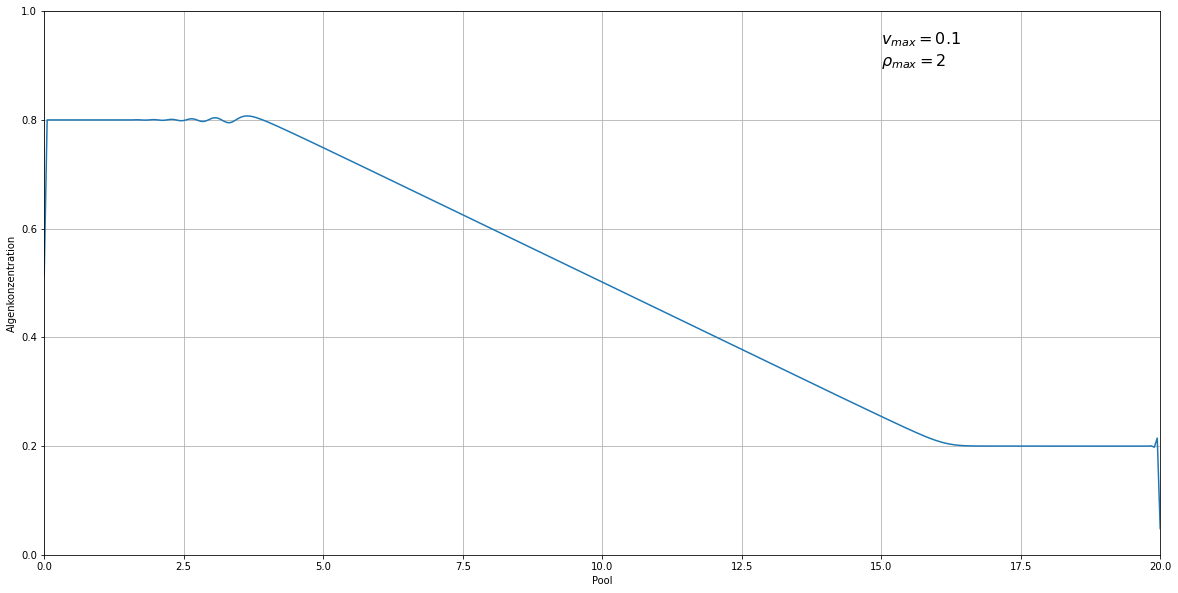

In [193]:
import numpy as np
import matplotlib.pyplot as plt



v_max = 0.1
roh_max = 2


#Modell des Beckens
#default Werte für Länge = 20
#und 360 Unterteilungen
def pool_model(l=20, n=380):   
    pool_sections = np.full(n, 0.2)
    steps = np.linspace(0, l, n)
    
    return [steps, pool_sections]


#berechnet den Fluss aus der Dichte
def flow(roh):
    return v_max * (1 - roh / roh_max) * roh



def macCormack_verfahren(t0, tN, n, pool):
    if n:  #prüft Eingabe, damit nicht duch null dividiert wird
        dt = (tN - t0) / n
        
    h = (pool[0][-1] - pool[0][0]) / pool[0].size
    
    #Schleife über alle Zeitschritte und Teilabschnitte des Beckens
    for j in range(n):
        roh = pool[1].copy()
        roh[0] = 0.8
        
        for i in range(pool[0].size):
            predictor_1 = roh[i] - dt / h * (flow(roh[i]) - flow(roh[i-1]))
            predictor_2 = roh[(i + 1) % pool[0].size] - dt / h * (flow(roh[(i + 1) % pool[0].size]) - flow(roh[i]))
            pool[1][i] = roh[i] - dt / (2 * h) * (flow(roh[i]) - flow(roh[i - 1]) + flow(predictor_2) - flow(predictor_1))
            
    return pool



pool = macCormack_verfahren(0, 200, 400, pool_model())

plt.figure(figsize=(20, 10))
plt.plot(pool[0], pool[1])
plt.xlabel('Pool')
plt.ylabel('Algenkonzentration')
plt.axis([0, 20, 0, 1])
plt.annotate(r'$v_{max}=0.1$' '\n' r'$\rho_{max}=2$', (15,0.9), fontsize=16)
plt.grid()
plt.show()

## Aufgabe 3.1

In [194]:
import numpy as np


#Model für Fusskrebs
class Crayfish:
    def __init__(self,p,v):
        self.pos=p
        self.velocity=v


        
#initialisiert Liste mit Flusskrebsen
def init_crayfishs():
    crayfishs=[]
    
    #Startposition und Geschwindigkeit
    init_positions=[0,2,5,9,12]
    init_velocities=[5,1,3,2, 5]
    
    #initialisiert Flusskrebse
    for i in range(len(init_positions)):
        crayfishs.append(Crayfish(init_positions[i],init_velocities[i]))
        
    return crayfishs



#initialisiert das Becken und setzt
#die Flusskrebse in das Becken
def init_pool():
    pool=np.full(20,None)
    for i in crayfishs:
        pool[i.pos]=i

    return pool



def print_timestep():
    for j in pool:
        if j == None:
            print('-----',end='')
        else:
            print('|',j.velocity,'|',end='')
    print()
    


#Schleife über alle Flusskrebse
#Berechnet Beschleunigung und Bremsen
def accelerate_and_brake():
    for j in crayfishs:
        if j.velocity < 5:
            j.velocity+=1
        for k in range(1,j.velocity+1):
            if pool[(j.pos+k)%20]!=None:
                j.velocity=k-1
                break


                
def move():
    for j in crayfishs:
        pool[j.pos]=None
        j.pos=(j.pos+j.velocity)%20
        pool[j.pos]=j



def simulation(n=10):
    print_timestep()
    #Schleife über n Zeitschritte
    for i in range(n):
        accelerate_and_brake()     
        move()
        print_timestep()
    

crayfishs=init_crayfishs()
pool=init_pool()
simulation()

| 5 |-----| 1 |----------| 3 |---------------| 2 |----------| 5 |-----------------------------------
-----| 1 |----------| 2 |---------------| 3 |----------| 2 |-------------------------| 5 |----------
| 3 |----------| 2 |---------------| 3 |----------| 2 |---------------| 3 |-------------------------
----------| 2 |---------------| 3 |----------| 2 |---------------| 3 |--------------------| 4 |-----
-----| 3 |---------------| 3 |----------| 2 |---------------| 3 |--------------------| 4 |----------
| 3 |---------------| 3 |----------| 2 |---------------| 3 |--------------------| 4 |---------------
---------------| 3 |----------| 2 |---------------| 3 |--------------------| 4 |---------------| 3 |
----------| 3 |----------| 2 |---------------| 3 |--------------------| 4 |---------------| 3 |-----
-----| 3 |----------| 2 |---------------| 3 |--------------------| 4 |---------------| 3 |----------
| 3 |----------| 2 |---------------| 3 |--------------------| 4 |---------------| 3 |------

## Aufgabe 3.2

Die makroskopische Simulation beschreibt ein System anhand von statistischen Größen, wie Fuss, Dichte oder Geschwindigkeit, wohingegen die mikroskopische Simulation ein System anhand dessen elementaren Teilen beschreibt. 

## Aufgabe 4.1

In [195]:
import numpy as np


#Konstante für Zustand tot oder lebendig
ALIVE = 1
DEAD = 0


#initialisiert einen leeren Automaten mit n Zellen
def init_world(n):
    world = np.full((n, n), DEAD)
    return world


#Textdatei einlesen
def parse_textfile(path):
    file = open(path, "r")
    source = list(file.readlines())
    creatur = np.empty(shape=(0,len(source[0])-1))
    
    for srt in source:
        row = []
        for c in srt:
            if c == '.':
                row.append(0)
            elif c == '0':
                row.append(1)
        
        creatur = np.vstack([creatur, row])
        
    file.close()
    return creatur


#setzt eine Figur in den AUtomaten
def add_creatur_to_world(world, creatur, row, col):
    for i in range(len(creatur[0])):
        for j in range(len(creatur[0])):
            if creatur[i][j] == 1:
                world[row+i][col+j] = ALIVE


#zählt die lebendigen Nachbarn der Moore-Nachbarschaft
def count_neighbors(world, row, col):
    count = 0
    for x, y in ((row - 1, col - 1), (row - 1, col), (row - 1, col + 1),
                (row,col-1),                (row,col+1),
                (row+1,col-1),(row+1,col),(row+1,col+1)):
        if world[x][y] == ALIVE:
            count += 1
    return count


#Reglen für die Zustandsänderung
def evolve_rule(world, row, col):
    cell_state = world[row][col]
    alive_neighbours = count_neighbors(world, row, col)
    #elle wird lebendig
    if cell_state == DEAD and alive_neighbours == 3:
        return ALIVE
    #Zelle stirbt an Einsamkeit
    if cell_state == ALIVE and alive_neighbours < 2:
        return DEAD
    #Zelle verhungert
    if cell_state == ALIVE and alive_neighbours > 3:
        return DEAD
    
    return cell_state
    

#Schleife und AUsgabe für n Simulationsschritte
def simulate_life(world, n):
    print(world)
    print()
    
    tmp_world=np.copy(world)
    for i in range(n):
        for row in range(1, len(world)-1):
            for col in range(1, len(world[0])-1):
                tmp_world[row][col] = evolve_rule(world, row, col)
        
        
        world = np.copy(tmp_world)
        print(world)
        print()

In [197]:
#Simulation mit Blinker und 4 Generationen
world=init_world(5)
add_creatur_to_world(world, parse_textfile('blinker.txt'), 0, 0)
print('blinker')
simulate_life(world, 3)

blinker
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]



In [198]:
#Simulation mit Toad und 4 Generationen
world=init_world(6)
add_creatur_to_world(world, parse_textfile('toad.txt'), 0, 0)
print('toad')
simulate_life(world, 3)

toad
[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]

[[0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]]

[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]

[[0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]]



In [199]:
#Simulation mit Beacon und 4 Generationen
world=init_world(6)
add_creatur_to_world(world, parse_textfile('beacon.txt'), 0, 0)
print('beacon')
simulate_life(world, 3)

beacon
[[0 0 0 0 0 0]
 [0 1 1 0 0 0]
 [0 1 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]

[[0 0 0 0 0 0]
 [0 1 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]

[[0 0 0 0 0 0]
 [0 1 1 0 0 0]
 [0 1 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]

[[0 0 0 0 0 0]
 [0 1 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]



In [203]:
#Simulation mit Clock und 4 Generationen
world=init_world(6)
add_creatur_to_world(world, parse_textfile('clock.txt'), 0, 0)
print('clock')
simulate_life(world, 3)

clock
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]]

[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 1 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]

[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]]

[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 1 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]



Die zellularen AUtomaten zeigen ein zyklisches Verhalten.

## Aufgabe 4.2

In [204]:
#Simulation mit Trafficlight und 10 Generationen
world=init_world(11)
add_creatur_to_world(world, parse_textfile('trafficlight.txt'), 0, 0)
print('trafficlight')
simulate_life(world, 9)

trafficlight
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0]
 [0 0 

Der zellulare Automat zeigt nach acht Generationen ein zyklische Verhalten, mit dem Zyklus (9.10.9)

In [202]:
#Simulation mit Glider und 10 Generationen
world=init_world(9)
add_creatur_to_world(world, parse_textfile('glider.txt'), 0, 0)
print('glider')
simulate_life(world, 9)

glider
[[0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0

Die lebendigen Zellen werden im weiteren Verlauf nach rechts unten wandern.